<a href="https://colab.research.google.com/github/akamalas5/capstone_test/blob/main/network_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Biadjacency matrix
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1

#Friends, Member
17 Evelyn Jefferson
15 Laura Mandeville
17 Theresa Anderson
15 Brenda Rogers
11 Charlotte McDowd
15 Frances Anderson
15 Eleanor Nye
16 Pearl Oglethorpe
17 Ruth DeSand
17 Verne Sanderson
16 Myra Liddel
16 Katherina Rogers
17 Sylvia Avondale
17 Nora Fayette
17 Helen Lloyd
16 Dorothy Murchison
12 Olivia Carleton
12 Flora Price

#Friend meetings, Member
50 Evelyn Jefferson

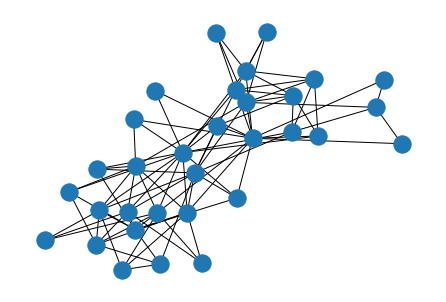

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.bipartite as bipartite

G = nx.davis_southern_women_graph()
women = G.graph["top"]
clubs = G.graph["bottom"]

print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(G, women, clubs))

# project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
print()
print("#Friends, Member")
for w in women:
    print(f"{W.degree(w)} {w}")

# project bipartite graph onto women nodes keeping number of co-occurence
# the degree computed is weighted and counts the total number of shared contacts
W = bipartite.weighted_projected_graph(G, women)
print()
print("#Friend meetings, Member")
for w in women:
    print(f"{W.degree(w, weight='weight')} {w}")

pos = nx.spring_layout(G, seed=648)  # Seed layout for reproducible node positions
nx.draw(G, pos)
plt.show()

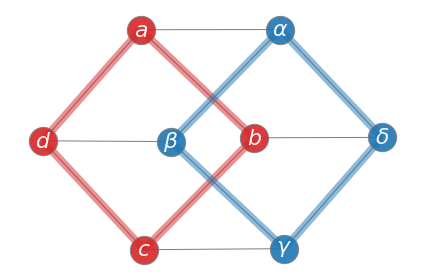

In [ ]:
G = nx.cubical_graph()
pos = nx.spring_layout(G, seed=3113794652)  # positions for all nodes

# nodes
options = {"edgecolors": "tab:gray", "node_size": 800, "alpha": 0.9}
nx.draw_networkx_nodes(G, pos, nodelist=[0, 1, 2, 3], node_color="tab:red", **options)
nx.draw_networkx_nodes(G, pos, nodelist=[4, 5, 6, 7], node_color="tab:blue", **options)

# edges
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
nx.draw_networkx_edges(
    G,
    pos,
    edgelist=[(0, 1), (1, 2), (2, 3), (3, 0)],
    width=8,
    alpha=0.5,
    edge_color="tab:red",
)
nx.draw_networkx_edges(
    G,
    pos,
    edgelist=[(4, 5), (5, 6), (6, 7), (7, 4)],
    width=8,
    alpha=0.5,
    edge_color="tab:blue",
)


# some math labels
labels = {}
labels[0] = r"$a$"
labels[1] = r"$b$"
labels[2] = r"$c$"
labels[3] = r"$d$"
labels[4] = r"$\alpha$"
labels[5] = r"$\beta$"
labels[6] = r"$\gamma$"
labels[7] = r"$\delta$"
nx.draw_networkx_labels(G, pos, labels, font_size=22, font_color="whitesmoke")

plt.tight_layout()
plt.axis("off")
plt.show()

In [ ]:
import plotly.graph_objects as go


In [ ]:
G = nx.random_geometric_graph(200, 0.125)
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

In [ ]:
node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append('# of connections: '+str(len(adjacencies[1])))

node_trace.marker.color = node_adjacencies
node_trace.text = node_text

In [ ]:
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph made with Python',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: <a href='https://plotly.com/ipython-notebooks/network-graphs/'> https://plotly.com/ipython-notebooks/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()


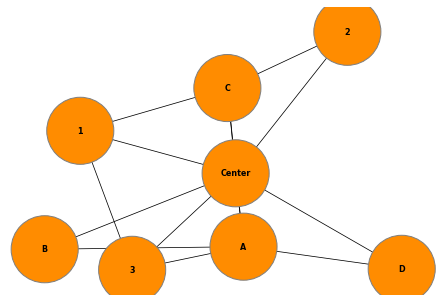

In [ ]:
# Create node characteristics DF
import pandas as pd
from matplotlib.pyplot import *


carac = pd.DataFrame({'ID':['Jules\nFisher', 'Peggy\nEisenhauer', 'Jennifer\nTipton', 
                            'Thomas\nSkelton', 'Donald\nHolder', 'Christopher\nAkerlind', 
                            'Howell\nBinkley', 'Jean\nRosenthal', 'Stanley\nMcCandless', 
                            'Brian\nMacDevitt', 'Kenneth\nPosner', 'Natasha\nKatz', 
                            'Jeff\nCroiter', 'Jennifer\nSchriever', 'Roger\nMorgan', 
                            'Paul\nGallo', 'Ming Cho\nLee', 'Ken\nBillington', 
                            'Tharon\nMusser', 'Mike\nBaldassari', 'Brian\nMonahan', 
                            'Peter\nNigrini', 'Richard\nPilbrow', 'Beverly\nEmmons', 
                            'Robert\nOrnbo', 'William\nRitman', 'Yale\nSchool\nof Drama', 
                            'Stephen\nStrawbridge', 'Pat\nCollins', 'David\nLander', 
                            'NYU\nTisch', 'Allen Lee\nHughes', 'Bradley\nKing', 
                            'Dennis\nParichy', 'SUNY\nPurchase', 'Robert\nWierzel', 
                            'Mary Louise\nGeiger', 'Jane\nCox', 'Jo\nMielziner', 
                            'Bill\nMintzer', 'Clifton\nTaylor', 'John\nGleason', 
                            'Rita Kogler\nCarver', 'Peggy\nClark', 'Gilbert\nHemsley Jr', 
                            'Peter\nHunt', 'Williamstown\nTheatre\nFestival', 
                            'James\nIngalls', 'Rui\nRita', 'Lee\nWatson', 'Japhy\nWeideman', 
                            'Kevin\nAdams', 'Richard\nNelson', 'Jay\nWoods', 
                            'Ian\nCalderon', 'Stacey\nBoggs', 'Al\nCrawford', 
                            'Robert\nHenderson'], 
                      
                      'type':['Person','Person','Person','Person', 'Person', 
                              'Person', 'Person', 'Person', 'Person', 
                              'Person', 'Person', 'Person', 'Person',
                              'Person', 'Person', 'Person', 'Person', 'Person',
                              'Person', 'Person', 'Person', 'Person', 'Person',
                              'Person', 'Person', 'Person', 'School', 'Person',
                              'Person', 'Person', 'School', 'Person', 'Person',
                              'Person', 'School', 'Person', 'Person', 'Person',
                              'Person', 'Person',
                              'Person', 'Person', 'Person', 'Person',
                              'Person', 'Person', 'Org', 'Person', 
                              'Person', 'Person', 'Person', 'Person', 
                              'Person', 'Person', 'Person', 'Person', 'Person', 
                              'Person']})

# Specify data and attributes
relationships = pd.DataFrame({'from': ['A', 'A', 'A', '1', '2', '3', '1', 'Center', 'Center', 
                                       'Center', 'Center', 'Center', 'Center', 'Center'], 
                              'to': ['B', 'C', 'D', 'C', 'C', 'A', '3', '1', '3', '2', 'A', 'B', 
                                     'C', 'D']})

# Create graph object using relationships DF
G = nx.from_pandas_edgelist(relationships, 'from', 'to', create_using=nx.Graph())

# Set colors by type
carac = carac.set_index('ID')
carac = carac.reindex(G.nodes())
 
carac['type'] = pd.Categorical(carac['type'])
carac['type'].cat.codes

# Set node size by type
node_sizes = [4500 if entry != 'Person' else 1500 for entry in carac.type]

# Set color map
cmap = matplotlib.colors.ListedColormap(['darkorange', 'lightgray', 'dodgerblue'])

# Draw the graph and specify our characteristics
nx.draw(G, with_labels=True, node_color=carac['type'].cat.codes, cmap=cmap, 
        node_size=node_sizes, font_size=8, font_weight="bold", width=0.75, 
        edgecolors='gray')

plt.show()